___
# Atividade: Variáveis qualitativas com a PNAD (ALUNOS)
___

## Aula 02


**Link úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html
4.  Estude a aula `Aula02 Análise Exploratoria Variáveis Qualitativas-ALUNOS.ipynb`, o qual contém uma introdução ao Jupyter Notebook. A publicação dessa aula tem como objetivo auxiliá-lo, caso queira, no desenvolvimento dos seus próximos programas, como esta atividade.

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).
2.  Trabalhar com a base de dados da PNAD 2013 - Pesquisa Nacional por Amostra de Domicílios

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


___
## <font color='blue'>PNAD 2013 – PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS</font>

**Base de dados reduzida: ** `pes2013A.txt` (75 MB)
[Acesse a base de dados aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/pes2013A.txt] 

**Dicionário das variáveis: ** `Dicionário de variáveis de pessoas - PNAD 2013.xlsx`
[Acesse dicionário aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/Dicion%C3%A1rio%20de%20vari%C3%A1veis%20de%20pessoas%20-%20PNAD%202013.xls]


Muitos especialistas na área de negócios dizem que empresários mais bem sucedidos são aqueles que fazem um planejamento antes de começar seu próprio negócio. Nessa visão, imagine que o Sr. Gold tenha como grande objetivo abrir uma nova faculdade e para isso deseja estudar o perfil do estudante que cursa ensino médio ou pré-vestibular e do que cursa ensino superior. 

Assuma que as variáveis de interesse a respeito dos estudantes sejam relativamente as mesmas de 2013 até o momento atual. Nesse caso, seja criativo para ajudar o Sr. Gold que deseja abrir seu negócio, mas não tem certeza sobre quais variáveis o interessam. 

Vocês podem ajudá-lo?!  

As variáveis a seguir devem fazer parte da sua análise:

* V0302: sexo
* V0404: cor ou raça
* V6002: rede de ensino
* V4802: nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)

** Crie uma variável com região do indivíduo amostrado considerando a variável `UF` que define o estado e também trabalhe com essa nova variável em suas análises. ** 

** Escolha mais pelo menos DUAS variáveis qualitativas para completar sua análise!! **

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo do Sr. Gold.

Sua análise deve conter pelo menos uma das seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) com as frequências relativas cadas categorias das variáveis qualitativas.
2. Tabela cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".


___



<font color='red'>
Crie um repositório chamado CD em seu Github
</font>


Neste repositório, salve seu trabalho numa pasta chamada aula2

Por exemplo, se seu login for *pikachu* o projeto vai estar na pasta:

https://github.com/<font color=red>pikachu/CD/aula2</font>



## <font color='red'>Terça-feira (dia 16/08), no horário de atendimento da sua turma, deverá apresentar aos NINJAS!!</font>
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
print('Diretório')
print(os.getcwd())

Diretório
C:\Users\thiagorc2\Desktop


In [3]:
dados = pd.read_table("pes2013A.txt", sep = " " , encoding = "windows-1252" )
n = dados.shape[0]

In [4]:
dados.shape[0]

362555

In [5]:
dados.REGIAO = dados.UF
dados.UF = dados.UF.astype('category')
dados.UF.cat.categories = ('RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF')


In [6]:
dados.REGIAO[(dados.UF == 'GO') | (dados.UF == 'MT') | (dados.UF == 'MS') | (dados.UF == 'DF')]  = "Centro Oeste"
dados.REGIAO[(dados.UF == 'AC') | (dados.UF == 'AM') | (dados.UF == 'AP') | (dados.UF == 'PA') | (dados.UF == 'RR') | (dados.UF == 'RO') | (dados.UF == 'TO')]  = "Norte"
dados.REGIAO[(dados.UF == 'RS') | (dados.UF == 'PR') | (dados.UF == 'SC')]  = "Sul"
dados.REGIAO[(dados.UF == 'ES') | (dados.UF == 'MG') | (dados.UF == 'RJ') | (dados.UF == 'SP')]  = "Sudeste"
dados.REGIAO[(dados.UF == 'AL') | (dados.UF == 'BA') | (dados.UF == 'CE') | (dados.UF == 'MA') | (dados.UF == 'PI') | (dados.UF == 'PE') | (dados.UF == 'PB') | (dados.UF == 'RN') | (dados.UF == 'SE')]  = "Nordeste"

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
# Idade
dados.V8005 = dados.V8005.astype('float')
# Anos após o último trabalho
dados.V1091 = dados.V1091.astype('float')
# Renda per capita
dados.V4742 = dados.V4742.astype('float')


In [9]:
idades = dados.V8005
faixas_idade = range(0,110, 5)
faixa_etaria = pd.cut(idades, faixas_idade)
faixa_etaria.value_counts()


(15, 20]      31615
(10, 15]      31418
(30, 35]      29744
(25, 30]      29004
(20, 25]      28795
(5, 10]       28071
(35, 40]      26775
(0, 5]        24791
(40, 45]      24567
(45, 50]      23414
(50, 55]      20383
(55, 60]      17486
(60, 65]      13761
(65, 70]      10067
(70, 75]       7628
(75, 80]       5122
(80, 85]       3087
(85, 90]       1455
(90, 95]        535
(95, 100]       157
(100, 105]       38
Name: V8005, dtype: int64

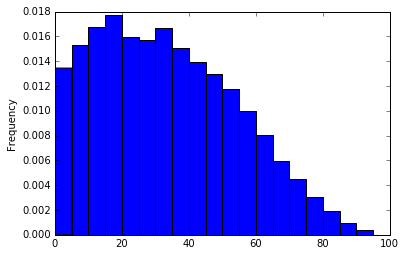

In [10]:
intervalo_idades = np.arange(0, 100, 5)
histograma1 = idades.plot.hist(bins=intervalo_idades, normed=1)

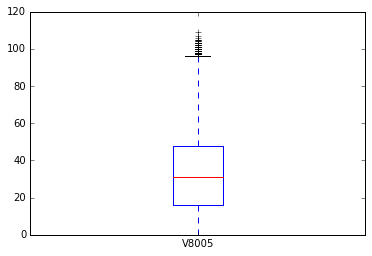

In [11]:
idades.plot.box()

In [28]:
idades.describe()

count    362555.000000
mean         33.049813
std          20.870874
min           0.000000
25%          16.000000
50%          31.000000
75%          48.000000
max         109.000000
Name: V8005, dtype: float64

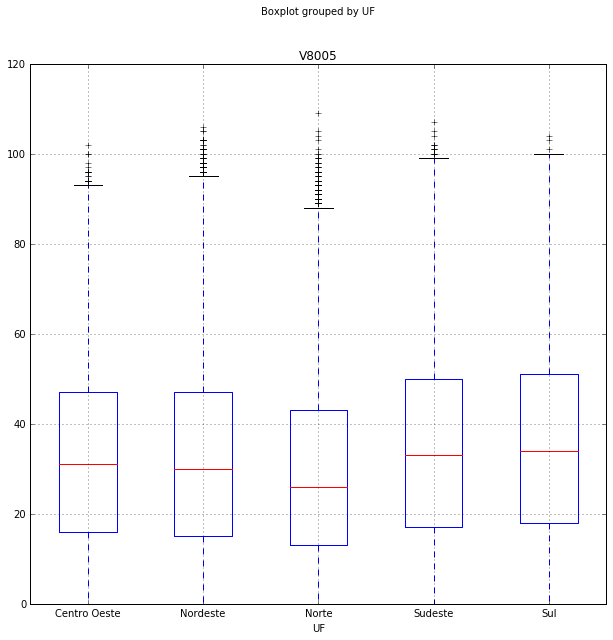

In [27]:
dados.boxplot(column= "V8005", by="UF", figsize=(10, 10))

In [14]:
renda = dados.V4742
faixas_renda = range(0,20000, 1000)
classe = pd.cut(renda, faixas_renda)
classe.value_counts()

(0, 1000]         255395
(1000, 2000]       54053
(2000, 3000]       13811
(3000, 4000]        6032
(4000, 5000]        3193
(5000, 6000]        1772
(6000, 7000]        1192
(7000, 8000]         820
(8000, 9000]         565
(9000, 10000]        500
(10000, 11000]       282
(11000, 12000]       219
(12000, 13000]       169
(13000, 14000]       155
(14000, 15000]        99
(15000, 16000]        67
(16000, 17000]        51
(17000, 18000]        46
(18000, 19000]        21
Name: V4742, dtype: int64

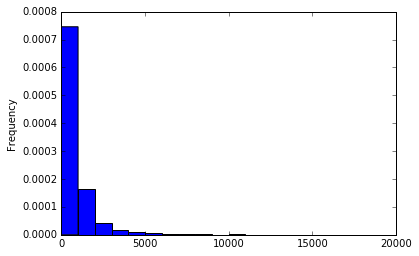

In [15]:
intervalo_renda = np.arange(0, 20000, 1000)
histograma2 = renda.plot.hist(bins=intervalo_renda, normed=1)

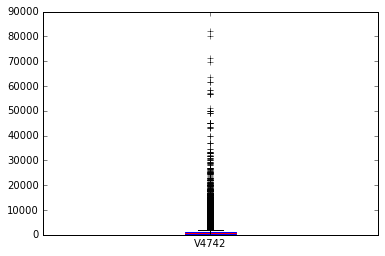

In [16]:
renda = renda[renda != 999999999999]
renda.plot.box()

In [17]:
renda.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    343224.000000
mean        923.885943
std        1473.710793
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max       82000.000000
Name: V4742, dtype: float64

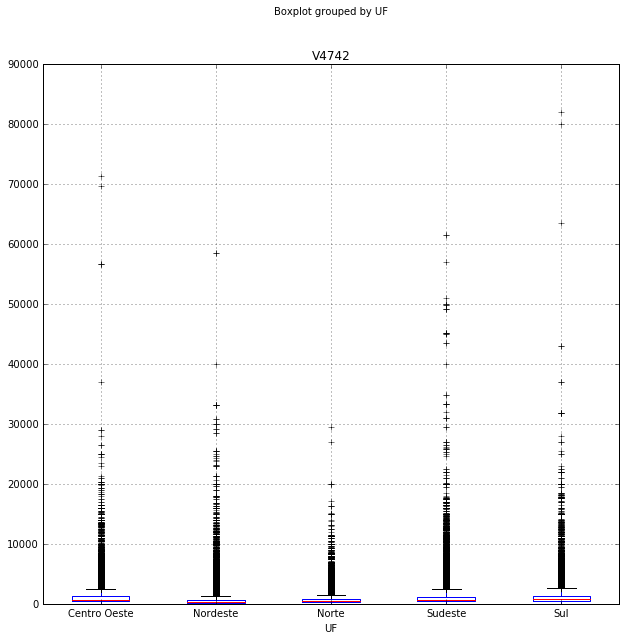

In [31]:
dados[dados.V4742 != 999999999999].boxplot(column= "V4742", by="UF", figsize=(10,10))

### Conclusâo
A analise de idades foi utilizada para descobrir qual região do país apresenta mais pessoas na idade média dos 
universitários, cerca dos 21 anos. O boxplot de idades demonstra que as melhores regiões para se abrir uma universidade de
acordo com esse parâmetro é a rgião norte, seguida pela nordeste.
    Ja a analise da renda percapita é utilizada para obter quais regiões apresentam uma maior quantidade de pessoas que sejam
capazes depagar por uma universidade particular. De acordo com a análise, por meio de boxplot, dessa variável a melhor região 
para o Sr. Gold abrir sua faculdade é a região Sul e Sudeste.